In [28]:
import drops, utilities, wave_reflection, vertical, constants
import pleasy
from scipy.optimize import fsolve
%matplotlib notebook

Impact: 0.017741774177417742
3.56932844846e-09 0.144508178393 BOUNCE CONDITIONS
Impact: 0.05680568056805681
4.98080458598e-07 0.11557735047 BOUNCE CONDITIONS
Impact: 0.08816881688168818
4.64831293314e-07 0.145115652073 BOUNCE CONDITIONS


<IPython.core.display.Javascript object>


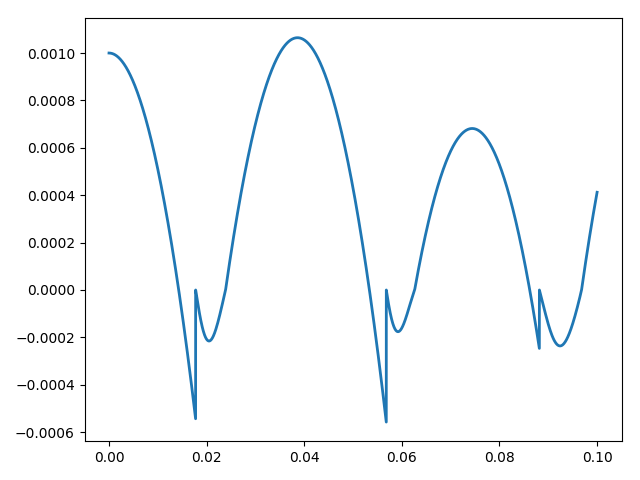

In [180]:
t = linspace(0, .1, 10000)

soln, impacts = drops.ode_standalone(t, corral=False)

z = soln[:, 0, 2]

pleasy.plot(t, z)


<IPython.core.display.Javascript object>


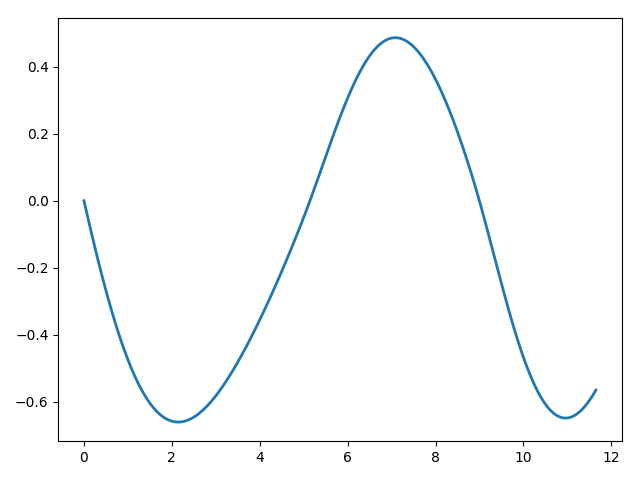

<IPython.core.display.Javascript object>


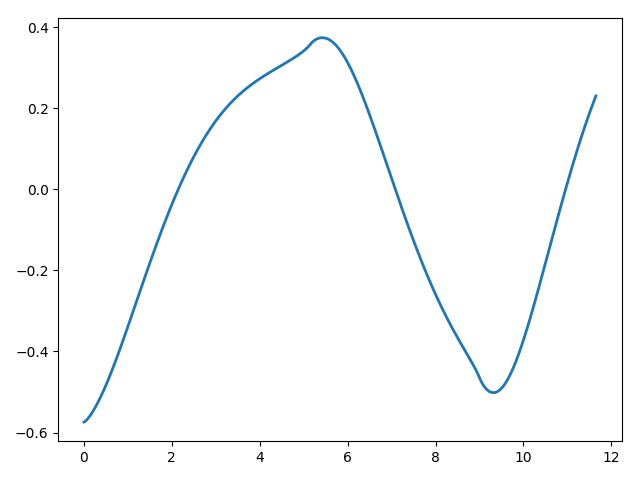

In [181]:
# Demonstrate the logarithmic spring model of the drop's vertical motion during contact with the bath.
t = linspace(0, .02, 1000)
τ = t * drops.ω_D

soln2 = vertical.log_spring(τ, vz)

Z, v = soln2[:, 0], soln2[:, 1]

pleasy.plot(τ, Z)
pleasy.plot(τ, v)

In [182]:
soln3 = vertical.lin_spring(τ)
pleasy.plot(τ, soln3[:,0])

TypeError: lin_spring() missing 1 required positional argument: 'v_in'

<IPython.core.display.Javascript object>


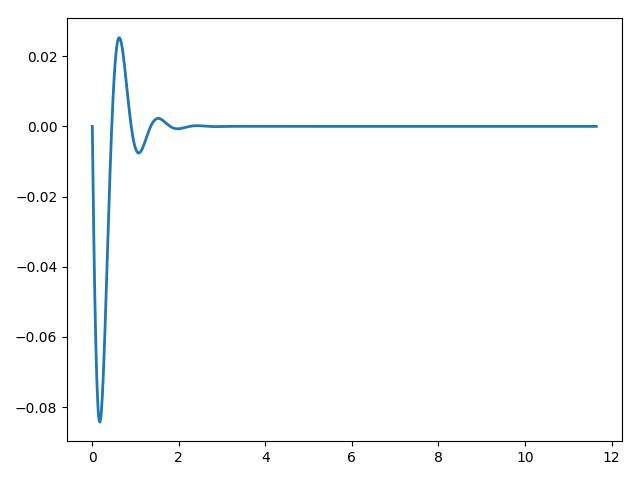

In [183]:
soln4 = vertical.lin_spring_analytic(τ)

pleasy.plot(τ, soln4)

(-114, 114) (-114, 114)


<IPython.core.display.Javascript object>


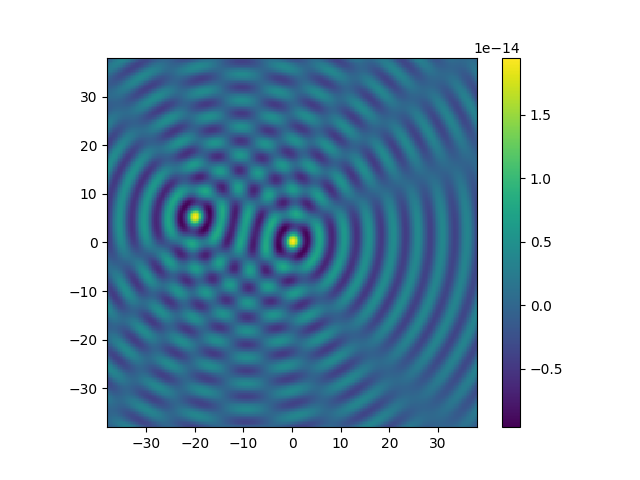

<IPython.core.display.Javascript object>


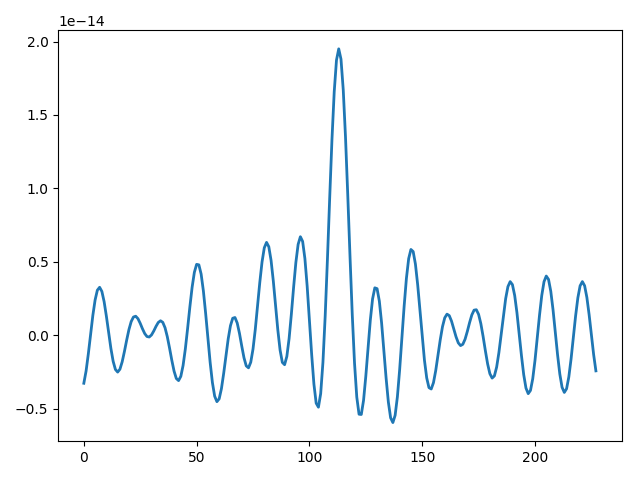

In [175]:
imps = [drops.Impact(0., 0., 0., 5.), drops.Impact(0., -20., 5., 5.)]
        

a = utilities.wave_field(.1, imps, resolution=3, plot=True, corral=False)

pleasy.plot(a[:, int(a.shape[1]/2)])